In [793]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [794]:
data = pd.read_csv('/content/datasets_9961_14084_Train - Copy.csv')
#d_test = pd.read_csv('/datasets_9961_14084_Test.csv')

In [795]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [796]:
print(data.shape)

(8523, 12)


In [797]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [798]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [799]:
# to print unique values
print(data.Item_Fat_Content.value_counts())
print(data.Item_Type.value_counts())
print(data.Outlet_Identifier.value_counts())
print(data.Outlet_Size.value_counts())
print(data.Outlet_Location_Type.value_counts())
print(data.Outlet_Type.value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Su

In [800]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [801]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [802]:
data.Outlet_Size.fillna(data.Outlet_Size.ffill(),inplace=True)

In [803]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [804]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [805]:
data.shape

(8523, 12)

In [806]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data.Outlet_Size = le.fit_transform(data.Outlet_Size)
data.Item_Fat_Content = le.fit_transform(data.Item_Fat_Content)

In [807]:
data = pd.get_dummies(data,columns=['Outlet_Type'],drop_first=True)
data = pd.get_dummies(data, columns=['Outlet_Location_Type'],drop_first=True)

In [808]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,3735.1380,1,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,443.4228,0,1,0,0,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,2097.2700,1,0,0,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,732.3800,0,0,0,0,1
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,994.7052,1,0,0,0,1


In [809]:
data.shape

(8523, 15)

Since the columns 'Item_Type' and 'Outlet_Identifier' have so many unique values. So, in these cases, we will use count/frequency encoding instead of onehot encoding or label encoding.

In [810]:
Item_type_mapping = data.Item_Type.value_counts().to_dict()
data.Item_Type = data.Item_Type.map(Item_type_mapping)

In [811]:
Outlet_Identifier_mapping = data.Outlet_Identifier.value_counts().to_dict()
data.Outlet_Identifier = data.Outlet_Identifier.map(Outlet_Identifier_mapping)

In [812]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0,0.016047,682,249.8092,930,1999,1,3735.1380,1,0,0,0,0
1,DRC01,5.92,1,0.019278,445,48.2692,928,2009,1,443.4228,0,1,0,0,1
2,FDN15,17.50,0,0.016760,425,141.6180,930,1999,1,2097.2700,1,0,0,0,0
3,FDX07,19.20,1,0.000000,1232,182.0950,555,1998,1,732.3800,0,0,0,0,1
4,NCD19,8.93,0,0.000000,910,53.8614,932,1987,0,994.7052,1,0,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8ecc31b00>,
      dtype=object)

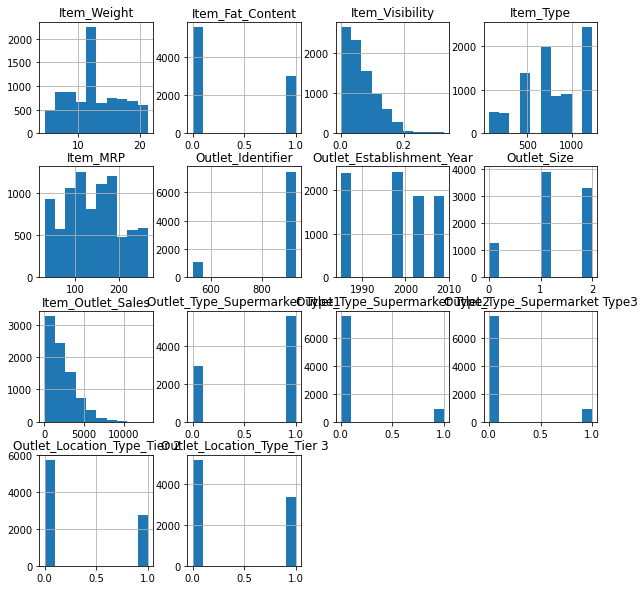

In [813]:
data.hist(figsize=(10,10))

From HISTOGRAM, It can be concluded that Outlet_Establishment_Year doesn't affect the sales much

In [814]:
from sklearn import preprocessing
data.Item_Weight = preprocessing.scale(data.Item_Weight)
data.Item_Type = preprocessing.scale(data.Item_Type)
data.Item_MRP = preprocessing.scale(data.Item_MRP)
data.Item_Outlet_Sales = preprocessing.scale(data.Item_Outlet_Sales)

In [815]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,-0.841872,0,0.016047,-0.287389,1.747454,930,1999,1,0.910601,1,0,0,0,0
1,DRC01,-1.641706,1,0.019278,-0.981192,-1.489023,928,2009,1,-1.018440,0,1,0,0,1
2,FDN15,1.098554,0,0.016760,-1.039741,0.010040,930,1999,1,-0.049238,1,0,0,0,0
3,FDX07,1.500838,1,0.000000,1.322702,0.660050,555,1998,1,-0.849103,0,0,0,0,1
4,NCD19,-0.929428,0,0.000000,0.380067,-1.399220,932,1987,0,-0.695373,1,0,0,0,1


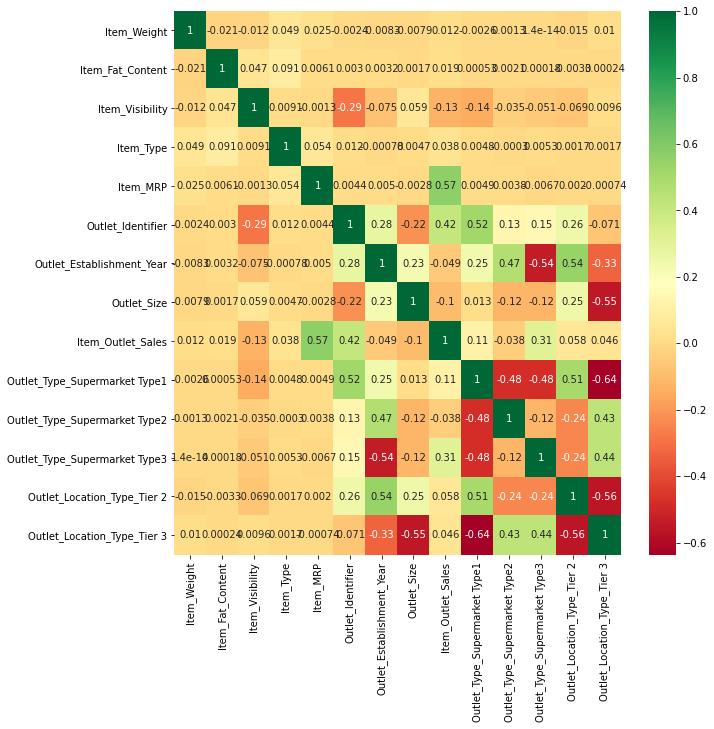

In [816]:
c = data.corr()
top_corr_features = c.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

So, sales largly depends upon Outlet_type

By visualizing the heat map, we can conclude that the columns 'Outlet_Establishment_Year' and 'Item_Type' can be dropped.

In [817]:
data = data.drop(columns=['Item_Identifier','Item_Weight','Item_Fat_Content','Outlet_Establishment_Year'])

In [818]:
data.head()

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.016047,-0.287389,1.747454,930,1,0.910601,1,0,0,0,0
1,0.019278,-0.981192,-1.489023,928,1,-1.018440,0,1,0,0,1
2,0.016760,-1.039741,0.010040,930,1,-0.049238,1,0,0,0,0
3,0.000000,1.322702,0.660050,555,1,-0.849103,0,0,0,0,1
4,0.000000,0.380067,-1.399220,932,0,-0.695373,1,0,0,0,1


In [819]:
data.shape

(8523, 11)

In [820]:
x = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']

In [821]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,bagging
from sklearn.neighbors import KNeighborsRegressor as KNR

In [822]:
from sklearn.metrics import mean_squared_error,r2_score

In [823]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [824]:
x_train.shape

(6818, 10)

In [825]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = (mse)**(0.5)
print('rmse:',rmse)
acc = 1-mse
print('accuracy = ',acc*100)

0.3928727559970349
rmse: 0.6267956253812201
accuracy =  60.712724400296516


In [826]:
score = r2_score(y_test,y_pred)
print(score)

0.5791099344537871


In [827]:
sr = svm.SVR(C=0.01)
sr.fit(x_train,y_train)
y_pred = sr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
acc = 1-mse
print('accuracy = ',acc*100)

0.8059831725910732
accuracy =  19.401682740892678


In [828]:
score = r2_score(y_test,y_pred)
print(score)

0.13653898071883186


In [829]:
i =[20]
test_score=[]
for ele in i:
  model = RandomForestRegressor(n_estimators=ele,max_depth=8,max_features=8)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test,y_pred)
  print(mse)
  acc = 1-mse
  test_score.append(acc)
print(test_score)

0.3702980805717884
[0.6297019194282116]


In [830]:
score = r2_score(y_test,y_pred)
print(score)

0.6032944992381373


In [831]:
dt = DecisionTreeRegressor(max_depth=8,max_features=8,random_state=42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
acc = 1-mse
print('accuracy = ',acc*100)


0.4079061314870776
accuracy =  59.209386851292244


In [832]:
knr = KNR()
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
acc = 1-mse
print('accuracy = ',acc*100)

0.4344367866988481
accuracy =  56.55632133011519


In [833]:
from sklearn.ensemble import BaggingRegressor
dt = DecisionTreeRegressor(max_depth=8,max_features=8,random_state=42)
n =[200,250,300,400,1000]
test_error=[]
accuracy = []
for k in n:
  bc = BaggingRegressor(base_estimator=dt,n_estimators=k,n_jobs=-1)
  bc.fit(x_train,y_train)
  y_pred = bc.predict(x_test)
  mse = mean_squared_error(y_test,y_pred)
  acc = 1-mse
  test_error.append(mse)
  accuracy.append(acc)
print('test_error:',test_error)
print('accuracy:',accuracy)

test_error: [0.36282877867999325, 0.36198480857255927, 0.3627972885571667, 0.36200932792216944, 0.36264209260582286]
accuracy: [0.6371712213200067, 0.6380151914274408, 0.6372027114428334, 0.6379906720778306, 0.6373579073941771]


In [834]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
#VC = VotingClassifier()
knr = KNeighborsRegressor()
dt = DecisionTreeRegressor(max_depth=8,max_features=8,random_state=42)
sr = svm.SVR(C=0.01)
Regressors= [('K Nearest Neighbour',knr),('Decision Tree',dt),('SVR',sr)]
for clf_name,clf in Regressors:
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  mse = mean_squared_error(y_test,y_pred)
  print(mse)

0.4344367866988481
0.4079061314870776
0.8059831725910732


In [835]:
VR = VotingRegressor(estimators=Regressors)
VR.fit(x_train,y_train)
y_pred = VR.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.41924055580782094


Here, it can be found that Random Forest Regressor works better and Bagging Regressor also works better.